> Pharmacokinetic Analysis

Ref: [FDA](https://www.fda.gov/media/70115/download)

# Import

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

> When conducting a steady-state investigation, data on the minimum drug concentrations 
(trough values) observed during a single dosing interval (CMIN) should also be collected 
Generally, three successive CMIN values should be provided to verify that steady-sta e
conditions have been achieved. Although CMIN most frequently occurs immediat ly
prior to the next successive dose, situations do occur with CMIN observed subsequen  to
dosing. To determine a steady state concentration, the CMIN values should be regr ssed
over time and the resultant slope should be tested for its difference from zero. 

약동학 분석에서 반복 투여 디자인의 경우 항정상태가 확인되어야 하는데, 투약 0h 전 3 time points를 확인하는 것을 기본으로 한다.

# 용어 설명

Tau : 약물 투여 간격

ex) 1일 2회 투여 = tau는 12

ex) 5일간 1일 1회 투여 = tau는 24

# The condition of Steady State

[FDA guide](https://www.fda.gov/media/70115/download)

> When conducting a steady-state investigation, data on the minimum drug concentrations 
(trough values) observed during a single dosing interval (CMIN) should also be collected 
Generally, three successive CMIN values should be provided to verify that steady-sta e
conditions have been achieved. Although CMIN most frequently occurs immediat ly
prior to the next successive dose, situations do occur with CMIN observed subsequen  to
dosing. To determine a steady state concentration, the CMIN values should be regr ssed
over time and the resultant slope should be tested for its difference from zero. 

# 항정상태가 아닌 경우

In [31]:
# CMIN 값들
cmin_values = [2.1, 2.3, 2.2]  # 예시로 세 개의 CMIN 값 사용

In [32]:
# 시간 (예: 0시간, 12시간, 24시간)
time_values = [0, 12, 24]

In [33]:
# 회귀 분석
slope, intercept, r_value, p_value, std_err = stats.linregress(time_values, cmin_values)

In [34]:
# 결과 출력
print("회귀 분석 결과:")
print("기울기:", slope)
print("절편:", intercept)
print("상관 계수:", r_value)
print("p-value:", p_value)
print("표준 오차:", std_err)

회귀 분석 결과:
기울기: 0.00416666666666667
절편: 2.1500000000000004
상관 계수: 0.5000000000000011
p-value: 0.6666666666666659
표준 오차: 0.007216878364870306


In [35]:
# 기울기가 0과 유의미한 차이가 있는지 확인
alpha = 0.05  # 유의 수준
if p_value < alpha:
    print("기울기가 0과 유의미한 차이가 있음. 일정 상태 조건이 충족됨.")
else:
    print("기울기가 0과 유의미한 차이가 없음. 일정 상태 조건이 충족되지 않음.")

기울기가 0과 유의미한 차이가 없음. 일정 상태 조건이 충족되지 않음.


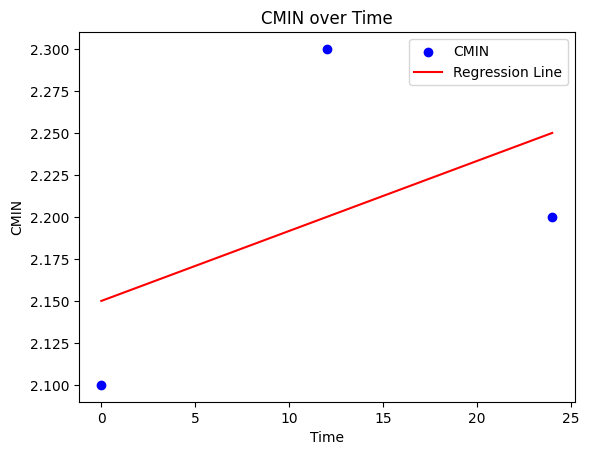

In [36]:
# 그래프 그리기
plt.scatter(time_values, cmin_values, color='blue', label='CMIN')
plt.plot(time_values, intercept + slope * np.array(time_values), color='red', label='Regression Line')
plt.xlabel('Time')
plt.ylabel('CMIN')
plt.title('CMIN over Time')
plt.legend()

# 항정상태인 경우

In [24]:
# CMIN 값들
cmin_values = [2.1, 2.2, 2.1] 

In [25]:
# 시간 (예: 0시간, 12시간, 24시간)
time_values = [0, 12, 24]

In [26]:
# 회귀 분석
slope, intercept, r_value, p_value, std_err = stats.linregress(time_values, cmin_values)

In [27]:
# 결과 출력
print("회귀 분석 결과:")
print("기울기:", slope)
print("절편:", intercept)
print("상관 계수:", r_value)
print("p-value:", p_value)
print("표준 오차:", std_err)

회귀 분석 결과:
기울기: 0.0
절편: 2.1333333333333333
상관 계수: 0.0
p-value: 1.0
표준 오차: 0.0048112522432468855


In [28]:
# 기울기가 0과 유의미한 차이가 있는지 확인
alpha = 0.05  # 유의 수준
if p_value < alpha:
    print("기울기가 0과 유의미한 차이가 있음. 일정 상태 조건이 충족됨.")
else:
    print("기울기가 0과 유의미한 차이가 없음. 일정 상태 조건이 충족되지 않음.")

기울기가 0과 유의미한 차이가 없음. 일정 상태 조건이 충족되지 않음.


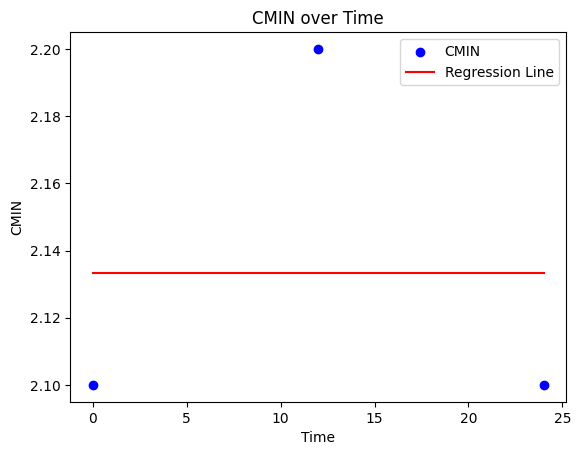

In [30]:
# 그래프 그리기
plt.scatter(time_values, cmin_values, color='blue', label='CMIN')
plt.plot(time_values, intercept + slope * np.array(time_values), color='red', label='Regression Line')
plt.xlabel('Time')
plt.ylabel('CMIN')
plt.title('CMIN over Time')
plt.legend()

## Winnonlin Guide

[윈놀린 가이드 참고](https://onlinehelp.certara.com/phoenix/8.3/responsive_html5_!MasterPage!/WinNonlin%20User%27s%20Guide.pdf)하여 용어 정리

`Tmin`: Time of minimum observed concentration. For steady-state data, based on observations col-lected during the dosing interval (i.e., after the dosing time, but no later than dosing time plus Tau, where Tau is the dosing interval). If the minimum observed concentration is not unique, then the first minimum is used. 
- Tmin은 항정상태에서 최소 혈중 농도가 기록된 time을 의미함


`Cmin`: Minimum observed concentration occurring at time Tmin as defined above.

$\star$ Cmin은 측정방법이 한정되지 않는다.

1. 항정상태에서 최소 농도(윈놀린에서는 이 값이 고유하지 않을 시 첫 번째 최소 농도를 기준으로 본다)

- 즉, 반복투여가 끝난 후에 기록된 최소 혈중 농도

2. tau 마지막 시점에서의 농도

FDA 정의

- The minimum concentration

[EMA 정의](https://www.ema.europa.eu/en/documents/scientific-guideline/guideline-pharmacokinetic-clinical-evaluation-modified-release-dosage-forms_en.pdf)

- Cmin,ss : Minimum plasma concentration at steady state 